# TP1 Vision — Naomi Couriel & Manuel Meiriño

## Initial Samples

<img src="img/cuadro_0.jpg" width="500">
<img src="img/cuadro_1.jpg" width="500">
<img src="img/cuadro_2.jpg" width="500">

<img src="img/udesa_0.jpg" width="500">
<img src="img/udesa_1.jpg" width="500">
<img src="img/udesa_2.jpg" width="500">


In [35]:
# Imports
import matplotlib.pyplot as plt
import cv2
import numpy as np

cuadro0 = cv2.imread("img/cuadro_0.jpg")
cuadro1 = cv2.imread("img/cuadro_1.jpg")
cuadro2 = cv2.imread("img/cuadro_2.jpg")
udesa0 = cv2.imread("img/udesa_0.jpg")
udesa1 = cv2.imread("img/udesa_1.jpg")
udesa2 = cv2.imread("img/udesa_2.jpg")

In [36]:
def find_corners(img, max_corners=500, method='harris'):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
    gray = np.float32(gray)

    if method == 'harris':
        harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
        threshold = 0.01 * harris_response.max()
        y, x = np.where(harris_response > threshold)
        r = harris_response[y, x]
        corners = np.column_stack((x, y, r))
        corners = corners[np.argsort(-corners[:, 2])][:max_corners]

    elif method == 'shi-tomasi':
        pts = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners,
                                      qualityLevel=0.05, minDistance=11,
                                      useHarrisDetector=False)
        if pts is None:
            return np.array([])
        corners = np.array([[p[0][0], p[0][1], 1.0] for p in pts])

    else:
        corners = np.array([])

    return corners

In [37]:
# plot_corners(udesa0, max_corners=500, method='harris')
# plot_corners(udesa0, max_corners=500, method='shi-tomasi')

# plot_corners(udesa1, max_corners=500, method='harris')
# plot_corners(udesa1, max_corners=500, method='shi-tomasi')

# plot_corners(udesa2, max_corners=500, method='harris')
# plot_corners(udesa2, max_corners=500, method='shi-tomasi')

In [38]:
# plot_corners(cuadro0, max_corners=500, method='harris')
# plot_corners(cuadro0, max_corners=500, method='shi-tomasi')

# plot_corners(cuadro1, max_corners=500, method='harris')
# plot_corners(cuadro1, max_corners=500, method='shi-tomasi')

# plot_corners(cuadro2, max_corners=500, method='harris')
# plot_corners(cuadro2, max_corners=500, method='shi-tomasi')

In [39]:
def adaptative_nonmaximum_suppression(corners, N):
    if len(corners) == 0:
        return np.array([])
    if len(corners) <= N:
        return corners

    radii = np.full(len(corners), np.inf)
    for i in range(len(corners)):
        xi, yi, ri = corners[i]
        stronger = corners[corners[:, 2] > ri]
        if len(stronger) > 0:
            dists = np.sqrt((xi - stronger[:, 0])**2 + (yi - stronger[:, 1])**2)
            radii[i] = np.min(dists)

    sorted_idx = np.argsort(-radii)
    return corners[sorted_idx[:N]]

In [40]:
# def compute_DoG(img, sigma1, sigma2):
#     img = np.float32(img)
#     gauss1 = cv2.GaussianBlur(img, (0, 0), sigma1)
#     gauss2 = cv2.GaussianBlur(img, (0, 0), sigma2)
#     DoG = gauss1 - gauss2
    
#     # print(f"Type of DoG is: {DoG.type()}")
#     print(f"Shape of DoG is: {DoG.shape}")
#     print(f"Preview of DoG is: {DoG[:5, :5]}")
#     return DoG

def find_corners(img, max_corners=500, method='harris'):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img
    gray = np.float32(gray)

    if method == 'harris':
        harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
        threshold = 0.01 * harris_response.max()
        y, x = np.where(harris_response > threshold)
        r = harris_response[y, x]
        corners = np.column_stack((x, y, r))
        corners = corners[np.argsort(-corners[:, 2])][:max_corners]

    elif method == 'shi-tomasi':
        pts = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners,
                                      qualityLevel=0.05, minDistance=11,
                                      useHarrisDetector=False)
        if pts is None:
            return np.array([])
        corners = np.array([[p[0][0], p[0][1], 1.0] for p in pts])

    else:
        corners = np.array([])

    return corners


# def get_anms_imgs(img, max_corners=500, method='harris', sigma1=1, sigma2=2, N_corners=100):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print(f"Image shape: {gray.shape}")
#     corners = find_corners(gray, max_corners, method=method)

#     DoG = compute_DoG(gray, sigma1, sigma2)
#     anms_corners = adaptative_nonmaximum_suppression(corners, N_corners)

#     plt.imshow(gray, cmap='gray')
#     plt.scatter(anms_corners[:, 0], anms_corners[:, 1], s=50, marker='+', color='red')
#     plt.show()

In [41]:
# get_anms_imgs(udesa0)
# get_anms_imgs(udesa1)
# get_anms_imgs(udesa2)

In [42]:
def plot_corners_comparison(img, max_corners=500, N_anms=100):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    corners_harris = find_corners(img, max_corners, method='harris')
    anms_harris = adaptative_nonmaximum_suppression(corners_harris, N_anms)

    corners_shi = find_corners(img, max_corners, method='shi-tomasi')
    anms_shi = adaptative_nonmaximum_suppression(corners_shi, N_anms)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Harris original
    axes[0,0].imshow(gray, cmap='gray')
    if len(corners_harris) > 0:
        axes[0,0].scatter(corners_harris[:, 0], corners_harris[:, 1], 
                          s=30, marker='+', color='red', alpha=0.7)
    axes[0,0].set_title(f'Harris Original ({len(corners_harris)} puntos)')
    axes[0,0].axis('off')

    # Harris ANMS
    axes[0,1].imshow(gray, cmap='gray')
    if len(anms_harris) > 0:
        axes[0,1].scatter(anms_harris[:, 0], anms_harris[:, 1], 
                          s=50, marker='+', color='red')
    axes[0,1].set_title(f'Harris ANMS ({len(anms_harris)} puntos)')
    axes[0,1].axis('off')

    # Shi-Tomasi original
    axes[1,0].imshow(gray, cmap='gray')
    if len(corners_shi) > 0:
        axes[1,0].scatter(corners_shi[:, 0], corners_shi[:, 1], 
                          s=30, marker='+', color='blue', alpha=0.7)
    axes[1,0].set_title(f'Shi-Tomasi Original ({len(corners_shi)} puntos)')
    axes[1,0].axis('off')

    # Shi-Tomasi ANMS
    axes[1,1].imshow(gray, cmap='gray')
    if len(anms_shi) > 0:
        axes[1,1].scatter(anms_shi[:, 0], anms_shi[:, 1], 
                          s=50, marker='+', color='blue')
    axes[1,1].set_title(f'Shi-Tomasi ANMS ({len(anms_shi)} puntos)')
    axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()
    return anms_harris, anms_shi

In [43]:
def extract_features(img, method="sift", nfeatures=500):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if method == "sift":
        detector = cv2.SIFT_create(nfeatures=nfeatures)
    elif method == "orb":
        detector = cv2.ORB_create(nfeatures=nfeatures)
    else:
        raise ValueError("Method must be 'sift' or 'orb'")
    kps, desc = detector.detectAndCompute(gray, None)
    corners = np.array([[kp.pt[0], kp.pt[1], kp.response] for kp in kps])
    return corners, desc, kps

Comparando Harris vs Shi-Tomasi con ANMS...


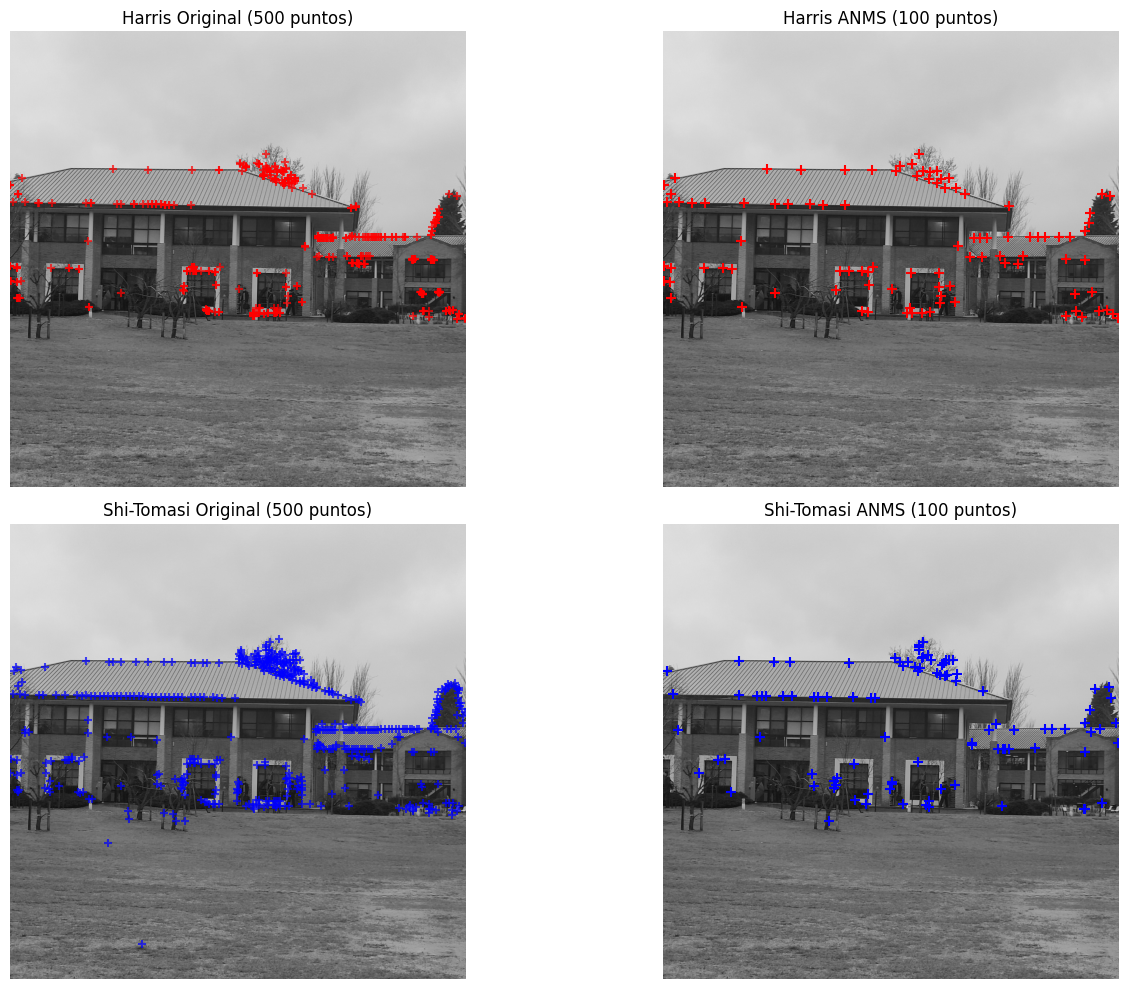


Extrayendo features con SIFT y ORB...
SIFT: 500 features
ORB: 500 features


In [44]:
print("Comparando Harris vs Shi-Tomasi con ANMS...")
if udesa0 is not None:
    anms_harris_0, anms_shi_0 = plot_corners_comparison(udesa0, max_corners=500, N_anms=100)

print("\nExtrayendo features con SIFT y ORB...")
if udesa0 is not None:
    corners_sift, desc_sift, kp_sift = extract_features(udesa0, method="sift")
    corners_orb, desc_orb, kp_orb = extract_features(udesa0, method="orb")
    print(f"SIFT: {len(corners_sift)} features")
    print(f"ORB: {len(corners_orb)} features")

In [45]:
def match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=True):
    if method == "sift":
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    elif method == "orb":
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    else:
        raise ValueError("method must be 'sift' or 'orb'")

    matches_knn = bf.knnMatch(desc1, desc2, k=2)

    good_matches = []
    for m, n in matches_knn:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

    if cross_check:
        matches_knn_rev = bf.knnMatch(desc2, desc1, k=2)
        good_rev = []
        for m, n in matches_knn_rev:
            if m.distance < ratio_thresh * n.distance:
                good_rev.append(m)

        cross_checked = []
        for m in good_matches:
            for rev in good_rev:
                if (m.queryIdx == rev.trainIdx) and (m.trainIdx == rev.queryIdx):
                    cross_checked.append(m)
                    break
        good_matches = cross_checked

    return good_matches


In [ ]:
def draw_matches(img1, kp1, img2, kp2, matches, max_draw=50):
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, 
                                  matches[:max_draw], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

Extrayendo descriptores con SIFT...
Matching udesa1 ↔ udesa0...
Total matches (udesa1-udesa0): 102


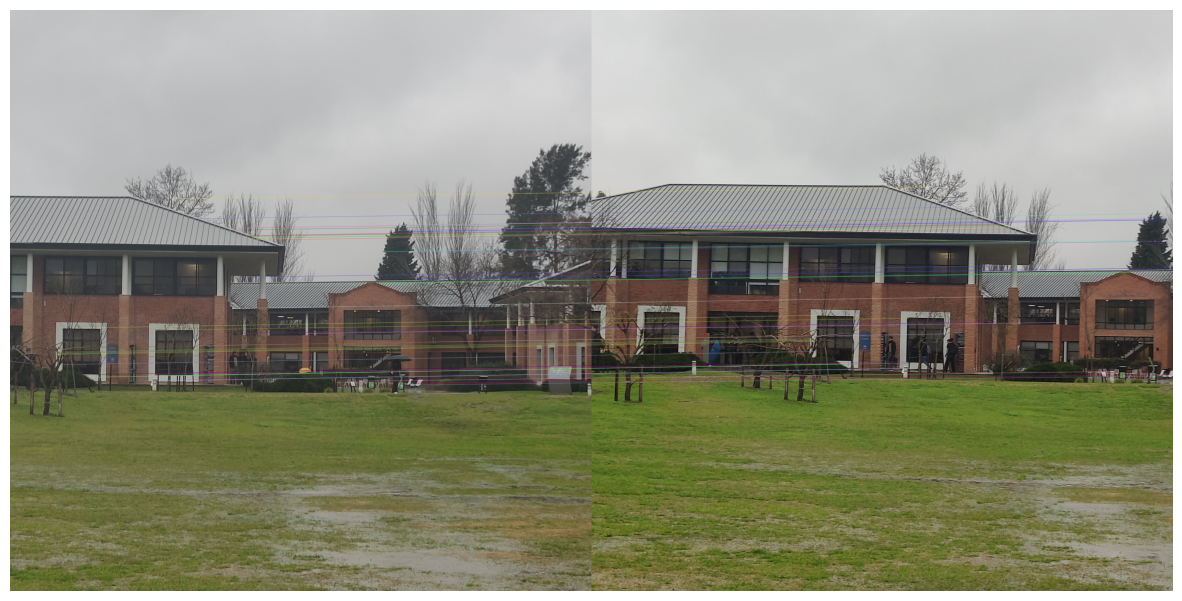

Matching udesa1 ↔ udesa2...
Total matches (udesa1-udesa2): 15


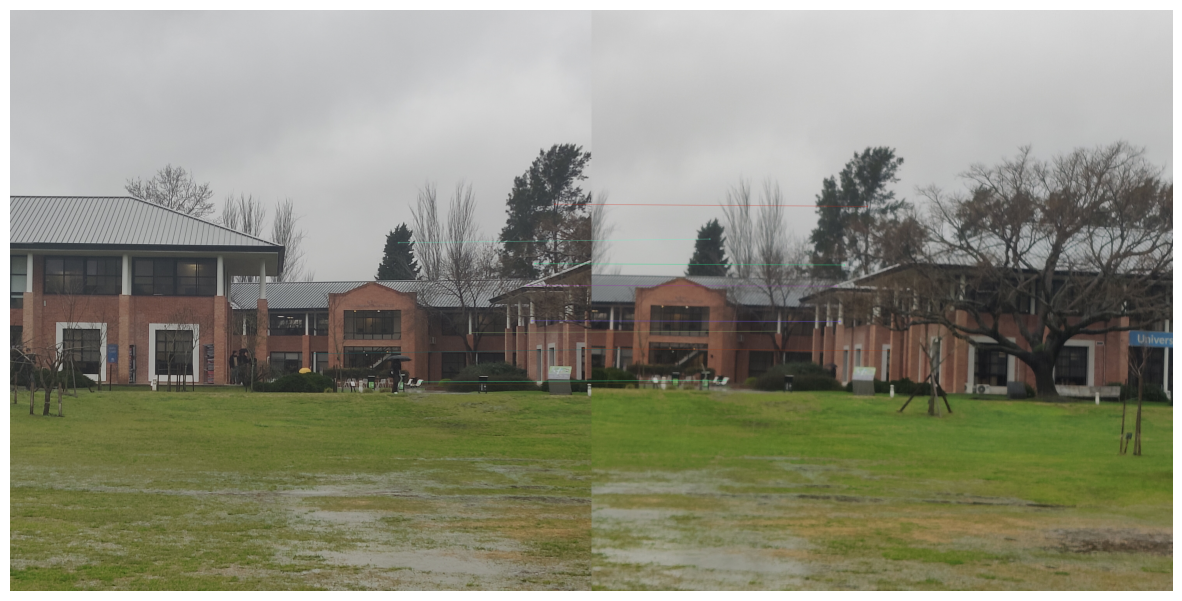

In [ ]:
_, desc0, kp0 = extract_features(udesa0, method="sift")
_, desc1, kp1 = extract_features(udesa1, method="sift")
_, desc2, kp2 = extract_features(udesa2, method="sift")

print("Matching udesa1 ↔ udesa0...")
matches_10 = match_features(desc1, desc0, method="sift", ratio_thresh=0.75, cross_check=True)
print(f"Total matches (udesa1-udesa0): {len(matches_10)}")
draw_matches(udesa1, kp1, udesa0, kp0, matches_10)

print("Matching udesa1 ↔ udesa2...")
matches_12 = match_features(desc1, desc2, method="sift", ratio_thresh=0.75, cross_check=True)
print(f"Total matches (udesa1-udesa2): {len(matches_12)}")
draw_matches(udesa1, kp1, udesa2, kp2, matches_12)

In [ ]:
import random

def draw_all_matches(img1, kp1, img2, kp2, matches, title="Todos los matches"):
    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(16, 8))
    plt.imshow(img_matches)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
def draw_subset_matches(img1, kp1, img2, kp2, matches, max_subset=30, title="Subset de matches"):
    if len(matches) > max_subset:
        subset = random.sample(matches, max_subset)
    else:
        subset = matches

    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        subset, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(16, 8))
    plt.imshow(img_matches)
    plt.title(f"{title} (mostrando {len(subset)})")
    plt.axis("off")
    plt.show()


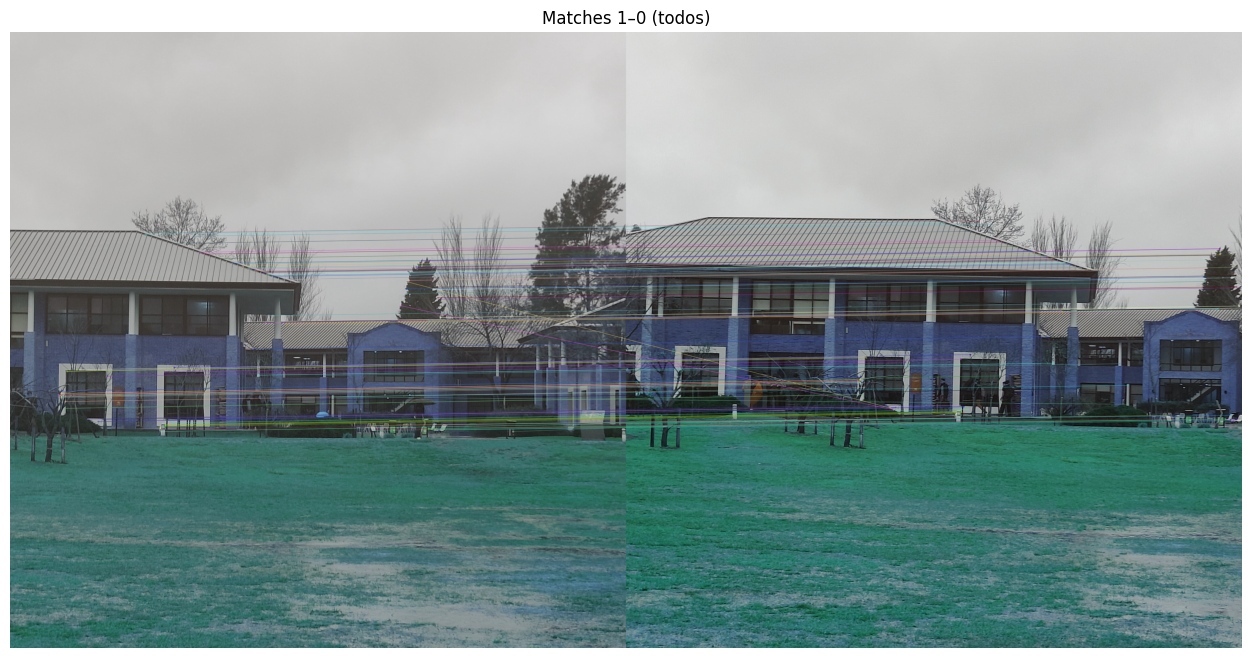

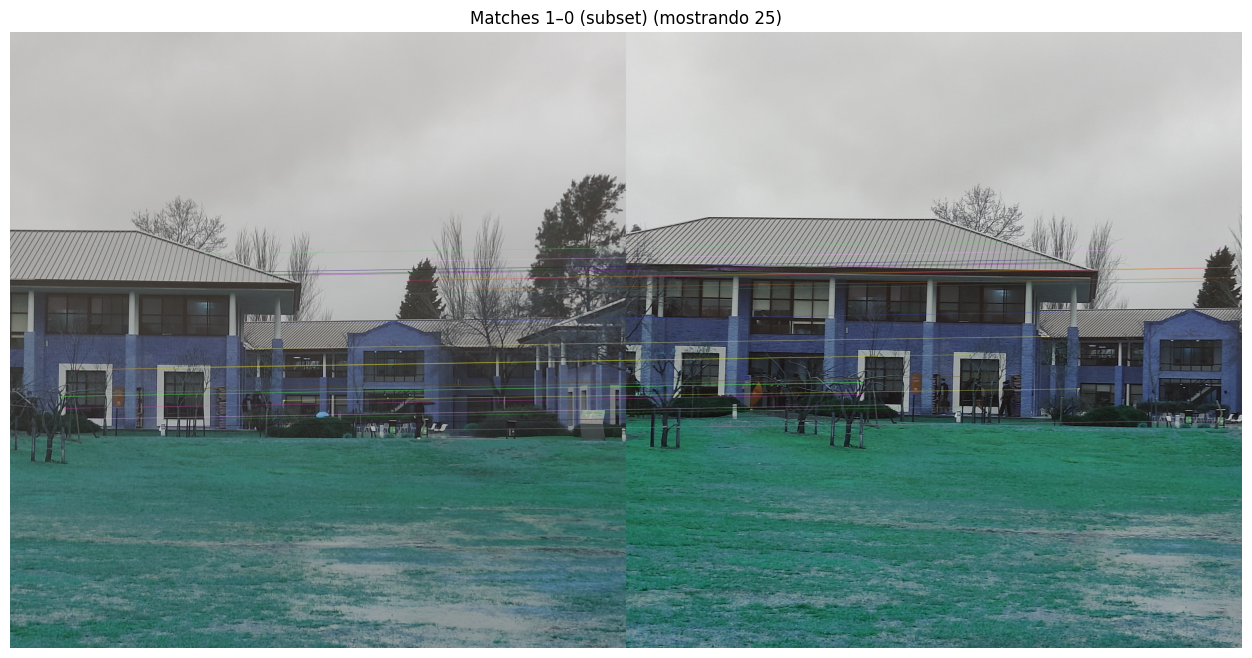

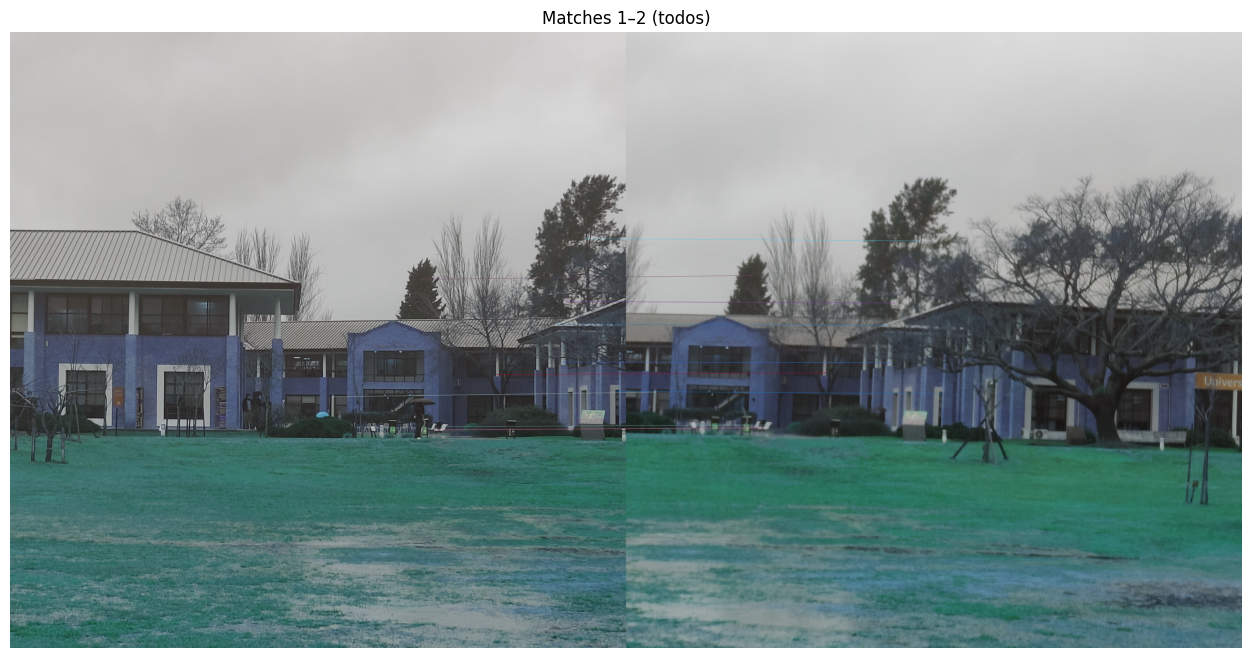

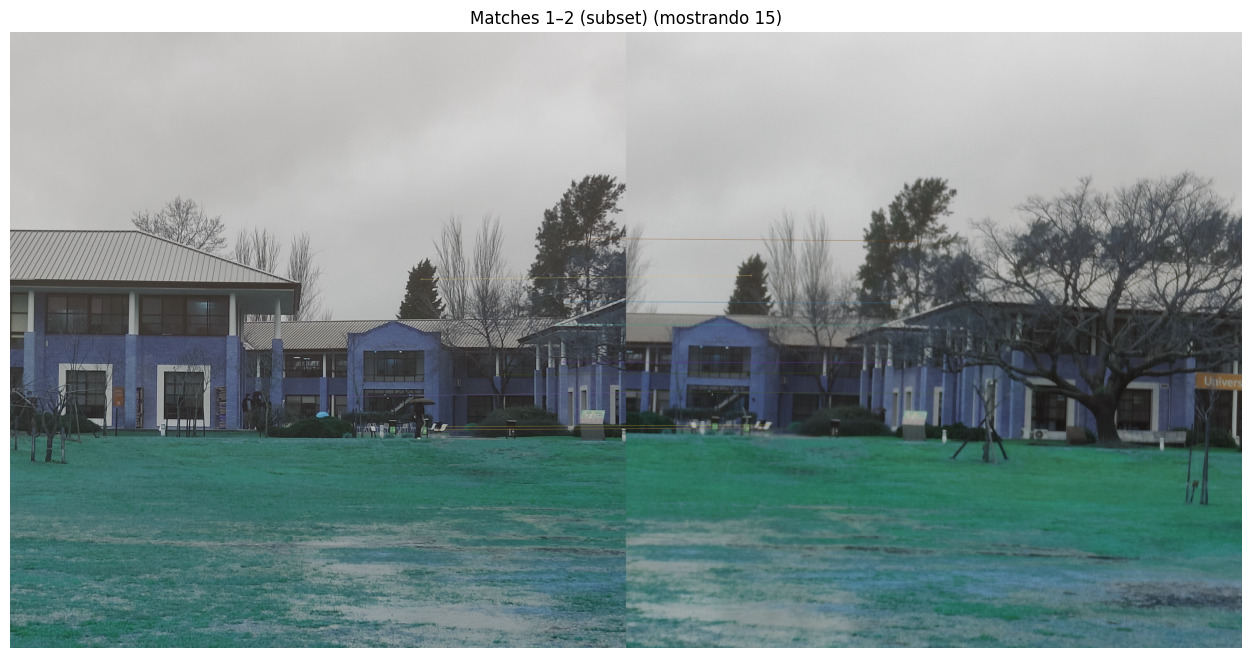

In [ ]:
draw_all_matches(udesa1, kp1, udesa0, kp0, matches_10, title="Matches 1–0 (todos)")

draw_subset_matches(udesa1, kp1, udesa0, kp0, matches_10, max_subset=25, title="Matches 1–0 (subset)")

draw_all_matches(udesa1, kp1, udesa2, kp2, matches_12, title="Matches 1–2 (todos)")

draw_subset_matches(udesa1, kp1, udesa2, kp2, matches_12, max_subset=20, title="Matches 1–2 (subset)")